# Load Library

In [24]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn import preprocessing as pre
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

# Analyzing Data

In [25]:
df = pd.read_csv("drug.csv")

In [26]:
df

,Unnamed: 0,urlDrugName,rating,effectiveness,condition,sideEffects
0,0,enalapril,4,Highly Effective,management of congestive heart failure,Mild Side Effects
1,1,ortho-tri-cyclen,1,Highly Effective,birth prevention,Severe Side Effects
2,2,ponstel,10,Highly Effective,menstrual cramps,No Side Effects
3,3,prilosec,3,Marginally Effective,acid reflux,Mild Side Effects
4,4,lyrica,2,Marginally Effective,fibromyalgia,Severe Side Effects
...,...,...,...,...,...,...
3102,3102,vyvanse,10,Highly Effective,adhd,Mild Side Effects
3103,3103,zoloft,1,Ineffective,depression,Extremely Severe Side Effects
3104,3104,climara,2,Marginally Effective,total hysterctomy,Moderate Side Effects
3105,3105,trileptal,8,Considerably Effective,epilepsy,Mild Side Effects


In [27]:
df = df.drop('Unnamed: 0', axis = 1)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   urlDrugName    3107 non-null   object
 1   rating         3107 non-null   int64 
 2   effectiveness  3107 non-null   object
 3   condition      3106 non-null   object
 4   sideEffects    3107 non-null   object
dtypes: int64(1), object(4)
memory usage: 121.5+ KB


In [44]:
df['condition'].fillna("depression", inplace = True) 
df.head()

,urlDrugName,rating,effectiveness,condition,sideEffects
0,enalapril,4,Highly Effective,management of congestive heart failure,Mild Side Effects
1,ortho-tri-cyclen,1,Highly Effective,birth prevention,Severe Side Effects
2,ponstel,10,Highly Effective,menstrual cramps,No Side Effects
3,prilosec,3,Marginally Effective,acid reflux,Mild Side Effects
4,lyrica,2,Marginally Effective,fibromyalgia,Severe Side Effects


## Missing Values

In [45]:
print("Missing values: \n", df.isna().sum()) 

Missing values: 
 urlDrugName      0
rating           0
effectiveness    0
condition        0
sideEffects      0
dtype: int64


# Preprocessing

## Dimention Reduction 

In [46]:
col_list = ['urlDrugName', 'rating', 'effectiveness', 'sideEffects', 'condition']
drugReview = pd.read_csv('drug.csv', usecols = col_list)
pd.set_option('display.max_columns',None)

In [47]:
drugReview

,urlDrugName,rating,effectiveness,condition,sideEffects
0,enalapril,4,Highly Effective,management of congestive heart failure,Mild Side Effects
1,ortho-tri-cyclen,1,Highly Effective,birth prevention,Severe Side Effects
2,ponstel,10,Highly Effective,menstrual cramps,No Side Effects
3,prilosec,3,Marginally Effective,acid reflux,Mild Side Effects
4,lyrica,2,Marginally Effective,fibromyalgia,Severe Side Effects
...,...,...,...,...,...
3102,vyvanse,10,Highly Effective,adhd,Mild Side Effects
3103,zoloft,1,Ineffective,depression,Extremely Severe Side Effects
3104,climara,2,Marginally Effective,total hysterctomy,Moderate Side Effects
3105,trileptal,8,Considerably Effective,epilepsy,Mild Side Effects


In [48]:
drugReview.isna().sum()

urlDrugName      0
rating           0
effectiveness    0
condition        1
sideEffects      0
dtype: int64

## Delete Missing Values

In [49]:
drugReview = drugReview.dropna(axis=0)

In [50]:
drugReview.isna().sum()

urlDrugName      0
rating           0
effectiveness    0
condition        0
sideEffects      0
dtype: int64

In [51]:
drugReview = drugReview[['urlDrugName', 'rating', 'sideEffects', 'condition', 'effectiveness']]

In [52]:
drugReview

,urlDrugName,rating,sideEffects,condition,effectiveness
0,enalapril,4,Mild Side Effects,management of congestive heart failure,Highly Effective
1,ortho-tri-cyclen,1,Severe Side Effects,birth prevention,Highly Effective
2,ponstel,10,No Side Effects,menstrual cramps,Highly Effective
3,prilosec,3,Mild Side Effects,acid reflux,Marginally Effective
4,lyrica,2,Severe Side Effects,fibromyalgia,Marginally Effective
...,...,...,...,...,...
3102,vyvanse,10,Mild Side Effects,adhd,Highly Effective
3103,zoloft,1,Extremely Severe Side Effects,depression,Ineffective
3104,climara,2,Moderate Side Effects,total hysterctomy,Marginally Effective
3105,trileptal,8,Mild Side Effects,epilepsy,Considerably Effective


In [53]:
le = LabelEncoder()

In [54]:
drugReview['urlDrugName'] = le.fit_transform(drugReview['urlDrugName'])
drugReview['sideEffects'] = le.fit_transform(drugReview['sideEffects'])
drugReview['condition'] = le.fit_transform(drugReview['condition'])
drugReview['effectiveness'] = le.fit_transform(drugReview['effectiveness'])

In [55]:
drugReview.head()

,urlDrugName,rating,sideEffects,condition,effectiveness
0,166,4,1,797,1
1,319,1,4,224,1
2,345,10,3,819,1
3,353,3,1,11,3
4,259,2,4,492,3


In [56]:
print(drugReview['effectiveness'].value_counts())

1    1330
0     928
4     415
2     246
3     187
Name: effectiveness, dtype: int64


In [57]:
drugReview.describe()

,urlDrugName,rating,sideEffects,condition,effectiveness
count,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000
mean,269.499356,7.007727,2.095943,608.555055,1.301674
std,147.264483,2.936681,1.148465,424.289999,1.315623
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,147.000000,5.000000,1.000000,236.000000,0.000000
50%,280.000000,8.000000,2.000000,561.000000,1.000000
75%,391.000000,9.000000,3.000000,951.000000,2.000000
max,501.000000,10.000000,4.000000,1425.000000,4.000000


In [58]:
drugReview.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3106 entries, 0 to 3106
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   urlDrugName    3106 non-null   int32
 1   rating         3106 non-null   int64
 2   sideEffects    3106 non-null   int32
 3   condition      3106 non-null   int32
 4   effectiveness  3106 non-null   int32
dtypes: int32(4), int64(1)
memory usage: 97.1 KB


# K-Means

In [59]:
X = drugReview.iloc[:, [1, 2]].values

In [60]:
X

array([[ 4,  1],
       [ 1,  4],
       [10,  3],
       ...,
       [ 2,  2],
       [ 8,  1],
       [ 4,  2]], dtype=int64)

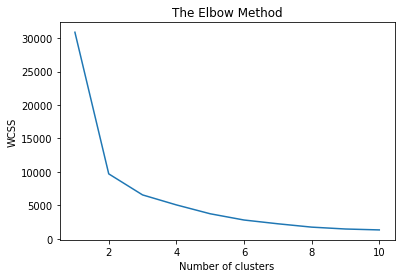

In [61]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [62]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

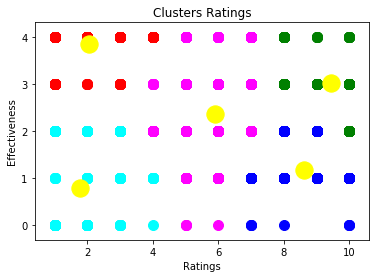

In [63]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters Ratings')
plt.xlabel('Ratings')
plt.ylabel('Effectiveness')
#plt.legend()
plt.show()

# Another K

## K=4

In [64]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

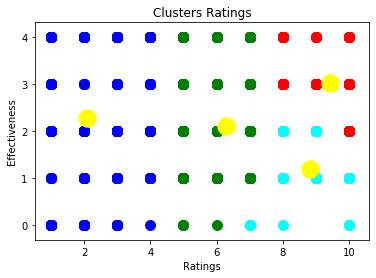

In [65]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters Ratings')
plt.xlabel('Ratings')
plt.ylabel('Effectiveness')
#plt.legend()
plt.show()

## K=6

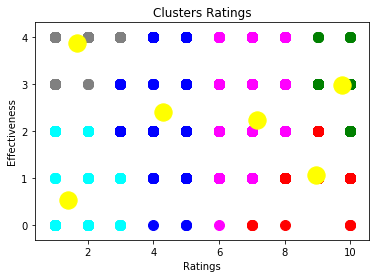

In [66]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'grey', label = 'Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters Ratings')
plt.xlabel('Ratings')
plt.ylabel('Effectiveness')
#plt.legend()
plt.show()